In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import math

In [72]:
df=pd.read_csv('C:\\Users\\pooja\\Desktop\\practice\\suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [73]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [74]:
newdf=df.iloc[:,2:5]
newdf

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [75]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [76]:
print('no.of user id ;'  + str(len(df)) )

no.of user id ;400


<Axes: xlabel='Purchased', ylabel='count'>

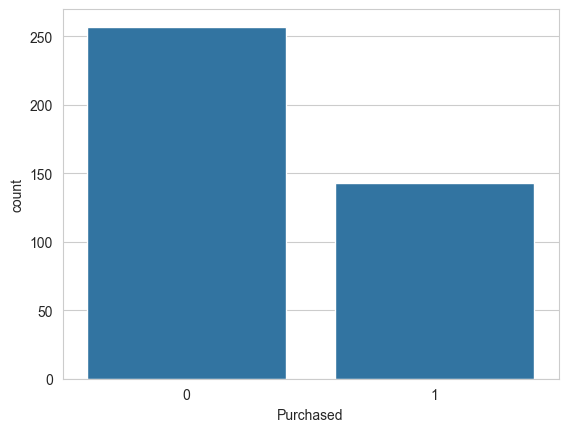

In [77]:
sns.countplot(x='Purchased' , data=df)

<Axes: xlabel='Purchased', ylabel='count'>

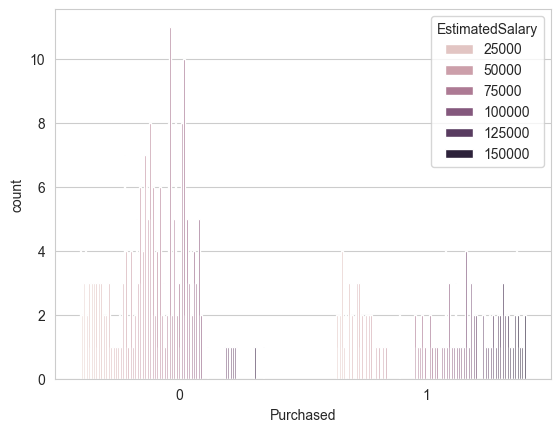

In [78]:
sns.countplot(x='Purchased', hue='EstimatedSalary' , data=df)

<Axes: xlabel='Purchased', ylabel='count'>

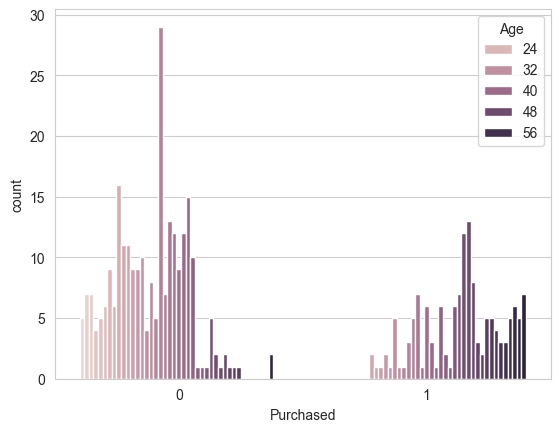

In [79]:
sns.countplot(x='Purchased' , hue='Age' , data=df)

In [80]:
newdf.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [81]:
from sklearn.cluster import KMeans

In [82]:
KMeans=KMeans(n_clusters=5) #assign no.
KMeans.fit(newdf)
KMeans.cluster_centers_

array([[3.68888889e+01, 5.37407407e+04, 1.11111111e-01],
       [4.17209302e+01, 1.09046512e+05, 7.90697674e-01],
       [3.53306452e+01, 7.90887097e+04, 2.17741935e-01],
       [4.37105263e+01, 1.38394737e+05, 9.21052632e-01],
       [3.72643678e+01, 2.68735632e+04, 4.02298851e-01]])

In [83]:
print(KMeans.labels_)
print(len(KMeans.labels_))

[4 4 0 0 2 0 2 3 4 0 2 0 2 4 2 2 4 4 4 4 4 0 0 4 4 4 4 4 0 4 2 3 4 0 2 4 4
 0 2 4 4 0 1 4 2 4 2 0 3 2 4 0 2 4 0 0 0 2 4 1 4 2 0 1 2 0 4 2 0 2 2 4 4 1
 4 1 0 4 2 4 2 0 0 2 0 1 0 2 2 0 2 1 4 4 2 0 4 1 2 4 2 0 2 3 4 2 4 2 2 2 2
 2 0 0 2 0 2 0 0 0 2 2 2 0 0 0 0 4 4 2 0 4 2 2 0 0 2 1 0 4 2 2 0 2 4 2 1 4
 0 2 4 0 2 0 0 4 0 2 4 3 1 2 4 4 2 2 0 2 3 0 2 1 1 0 2 4 0 4 4 4 4 2 1 0 0
 0 2 0 2 4 2 4 0 2 2 0 2 4 2 4 4 2 3 2 1 0 3 1 3 4 1 3 0 0 0 1 0 2 1 3 2 2
 3 1 0 0 3 3 2 2 3 0 1 2 1 2 0 2 2 3 3 0 2 1 2 3 0 1 0 1 4 0 3 3 0 2 2 0 1
 3 2 3 3 2 2 1 2 2 3 0 3 2 0 1 4 2 2 2 4 4 2 0 2 4 3 2 0 3 2 2 3 2 4 2 0 0
 2 1 2 1 4 2 3 2 0 0 3 1 3 0 2 1 0 3 2 2 1 0 4 0 3 2 0 4 3 0 2 2 1 1 0 1 0
 0 0 0 3 2 0 1 1 2 0 0 1 0 2 1 2 0 1 2 2 0 1 4 2 2 2 0 3 4 0 2 1 4 0 2 2 4
 0 2 2 3 2 4 2 0 2 4 0 4 3 4 4 0 4 2 4 4 4 4 0 0 0 0 4 4 4 4]
400


In [84]:
print(type(KMeans.labels_))
unique,counts=np.unique(KMeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{np.int32(0): np.int64(108), np.int32(1): np.int64(43), np.int32(2): np.int64(124), np.int32(3): np.int64(38), np.int32(4): np.int64(87)}


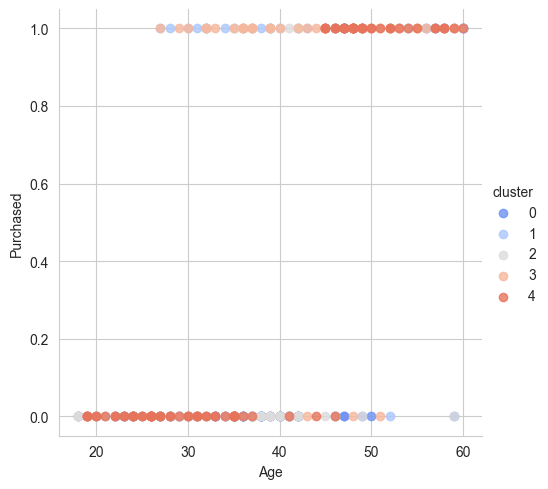

In [85]:
#plot the data
newdf['cluster'] = KMeans.labels_
sns.set_style("whitegrid")
sns.lmplot(x='Age' , y='Purchased' , data=newdf , hue='cluster', palette='coolwarm' , aspect=1, fit_reg=False )


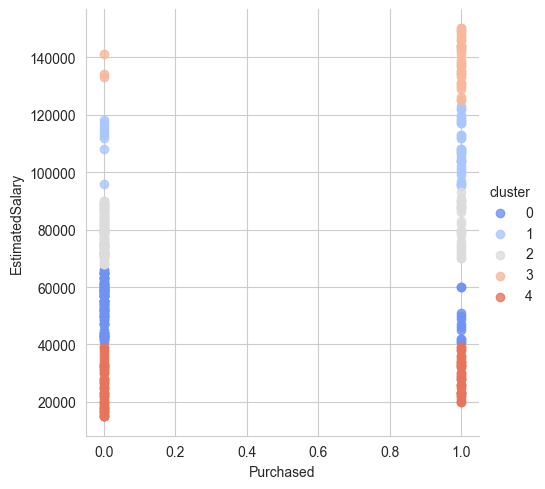

In [87]:
#plot the data
newdf['cluster'] = KMeans.labels_
sns.set_style("whitegrid")
sns.lmplot(x='Purchased' , y='EstimatedSalary' , data=newdf , hue='cluster', palette='coolwarm' , aspect=1, fit_reg=False )


In [ ]:
#from above graph we can conclude that  